In [1]:
!pip install obspy scikit-learn matplotlib numpy pandas

In [2]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader
import obspy
import numpy as np
import pandas as pd
from obspy import read
from obspy.core import Stream
import glob
import os
from scipy import signal
from datetime import datetime

In [3]:
# Program 1: P-Wave Early Detection
def download_early_pwave_data(event_time, latitude, longitude):
    domain = CircularDomain(
        latitude=latitude,
        longitude=longitude,
        minradius=0.0,
        maxradius=10.0 # 10 degrees (~1100 km)
    )
    restrictions = Restrictions(
        starttime=event_time - 30, # 30 seconds before
        endtime=event_time + 120,
        # 2 minutes after
        reject_channels_with_gaps=True,
        minimum_length=0.95,
        minimum_interstation_distance_in_m=5000, # 5 km minimum spacing
        # Prioritize high sample rate channels
        channel_priorities=["HH[ZNE]", "BH[ZNE]", "EH[ZNE]"],
        location_priorities=["", "00", "10"],
        # Additional parameters for data quality
        # minimum_sample_rate=100.0 # Ensure high sampling rate
    )
    mdl = MassDownloader()
    mdl.download(
        domain,
        restrictions,
        mseed_storage="waveforms_pwave",
        stationxml_storage="stations_pwave"
    )

In [4]:
# Program 2: Ground Motion Prediction
def download_ground_motion_data(event_time, latitude, longitude):
    domain = CircularDomain(
        latitude=latitude,
        longitude=longitude,
        minradius=0.0,
        maxradius=20.0 # 20 degrees (~2200 km)
    )
    restrictions = Restrictions(
        starttime=event_time - 60, # 1 minute before
        endtime=event_time + 600, # 10 minutes after
        reject_channels_with_gaps=True,
        minimum_length=0.90,
        minimum_interstation_distance_in_m=20000, # 20 km minimum spacing
        # Include strong motion channels
        channel_priorities=["HN[ZNE]", "HH[ZNE]", "BH[ZNE]"],
        location_priorities=["", "00", "10"],
        # Less strict on sample rate for surface waves
        # minimum_sample_rate=50.0
    )
    mdl = MassDownloader()
    mdl.download(
        domain,
        restrictions,
        mseed_storage="waveforms_motion",
        stationxml_storage="stations_motion"
    )

In [5]:
# Program 3: Aftershock Analysis
def download_aftershock_data(event_time, latitude, longitude):
  domain = CircularDomain(
    latitude=latitude,
    longitude=longitude,
    minradius=0.0,
    maxradius=15.0 # 15 degrees (~1650 km)
  )
  restrictions = Restrictions(
    starttime=event_time, # Start at mainshock
    endtime=event_time + 30 * 86400,
    # 30 days after
    reject_channels_with_gaps=False,
    # Allow some gaps due to long duration
    minimum_length=0.70,
    # More lenient minimum length
    minimum_interstation_distance_in_m=50000, # 50 km minimum spacing
    # Include broader range of channels
    channel_priorities=["HH[ZNE]", "BH[ZNE]", "HN[ZNE]", "EH[ZNE]"],
    location_priorities=["", "00", "10"],
    # Less strict on sample rate
    minimum_sample_rate=20.0
  )
  mdl = MassDownloader()
  mdl.download(
    domain,
    restrictions,
    mseed_storage="waveforms_aftershock",
    stationxml_storage="stations_aftershock"
  )# Example event (2011 Tohoku earthquake)
event_time = obspy.UTCDateTime(2011, 3, 11, 5, 47, 32)
event_latitude = 37.52
event_longitude = 143.04
# Download data for each analysis type
download_ground_motion_data(event_time, event_latitude, event_longitude)

[2025-02-19 07:54:32,204] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for AUSPASS, BGR, EIDA, EMSC, ETH, GEOFON, GEONET, GFZ, ICGC, IESDMC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, RESIFPH5, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2025-02-19 07:54:32,758] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'IESDMC'.
[2025-02-19 07:54:32,778] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'USGS' as it does not have 'dataselect' and/or 'station' services.
[2025-02-19 07:54:32,944] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2025-02-19 07:54:33,618] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2025-02-19 07:54:33,774] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'RESIFPH5' as it does not have 'dataselec

In [6]:
# Example event (2011 Tohoku earthquake)
event_time = obspy.UTCDateTime(2011, 3, 11, 5, 47, 32)
event_latitude = 37.52
event_longitude = 143.04
# Download data for each analysis type
download_ground_motion_data(event_time, event_latitude, event_longitude)

[2025-02-19 07:58:42,569] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for AUSPASS, BGR, EIDA, EMSC, ETH, GEOFON, GEONET, GFZ, ICGC, IESDMC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, RESIFPH5, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2025-02-19 07:58:42,569] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for AUSPASS, BGR, EIDA, EMSC, ETH, GEOFON, GEONET, GFZ, ICGC, IESDMC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, RESIFPH5, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2025-02-19 07:58:42,583] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2025-02-19 07:58:42,583] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2025-02-19 07:58:42,593] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does 

In [7]:
def process_station_metadata(station_dir):
    """
    Process station XML files to extract station metadata
    """
    metadata = []
    for xml_file in glob.glob(os.path.join(station_dir, "*.xml")):
        inventory = obspy.read_inventory(xml_file)
        for network in inventory:
            for station in network:
                station_info = {
                    'station_id': f"{network.code}.{station.code}",
                    'latitude': station.latitude,
                    'longitude': station.longitude,
                    'elevation': station.elevation,
                    'distance_to_event': None  # Will be calculated later
                }
                metadata.append(station_info)
    return pd.DataFrame(metadata)

def process_waveforms(waveform_dir, sampling_rate=100.0, window_size=60):
    """
    Process MSEED waveform files into fixed-length windows
    """
    features = []
    for mseed_file in glob.glob(os.path.join(waveform_dir, "*.mseed")):
        try:
            # Read the stream
            st = read(mseed_file)

            # Process each trace in the stream
            for tr in st:
                # Preprocess the trace
                tr = preprocess_trace(tr, sampling_rate)

                # Extract windows
                windows = extract_windows(tr, window_size, sampling_rate)

                for window in windows:
                    feature_dict = extract_features(window)
                    feature_dict.update({
                        'station_id': f"{tr.stats.network}.{tr.stats.station}",
                        'channel': tr.stats.channel,
                        'start_time': tr.stats.starttime
                    })
                    features.append(feature_dict)

        except Exception as e:
            print(f"Error processing {mseed_file}: {str(e)}")
            continue

    return pd.DataFrame(features)

def preprocess_trace(trace, sampling_rate):
    """
    Preprocess a single seismic trace
    """
    trace = trace.copy()

    # Remove mean and trend
    trace.detrend('demean')
    trace.detrend('linear')

    # Resample if necessary
    if trace.stats.sampling_rate != sampling_rate:
        trace.resample(sampling_rate)

    # Taper edges
    trace.taper(max_percentage=0.05, type='hann')

    return trace

def extract_windows(trace, window_size, sampling_rate):
    """
    Extract fixed-length windows from a trace
    """
    # Calculate number of samples per window
    samples_per_window = int(window_size * sampling_rate)

    # Get data array
    data = trace.data

    # Split into windows
    windows = []
    for i in range(0, len(data) - samples_per_window, samples_per_window):
        window = data[i:i + samples_per_window]
        if len(window) == samples_per_window:
            windows.append(window)

    return windows

def extract_features(window):
    """
    Extract features from a window of seismic data
    """
    features = {
        # Time domain features
        'mean': np.mean(window),
        'std': np.std(window),
        'max': np.max(np.abs(window)),
        'peak_to_peak': np.ptp(window),
        'rms': np.sqrt(np.mean(np.square(window))),

        # Frequency domain features
        'dominant_freq': compute_dominant_frequency(window),
        'spectral_centroid': compute_spectral_centroid(window),

        # Energy features
        'energy': np.sum(np.square(window)),

        # Store raw waveform for ML model
        'waveform': window.tolist()
    }
    return features

def compute_dominant_frequency(window, fs=100.0):
    """
    Compute the dominant frequency in a window
    """
    freqs, psd = signal.welch(window, fs=fs)
    return freqs[np.argmax(psd)]

def compute_spectral_centroid(window, fs=100.0):
    """
    Compute the spectral centroid of a window
    """
    freqs, psd = signal.welch(window, fs=fs)
    return np.sum(freqs * psd) / np.sum(psd)

def create_ml_dataset(waveform_dir, station_dir, event_coords):
    """
    Create complete dataset for ML modeling
    """
    # Process station metadata
    station_df = process_station_metadata(station_dir)

    # Calculate distances to event
    for idx, row in station_df.iterrows():
        station_df.loc[idx, 'distance_to_event'] = obspy.geodetics.locations2degrees(
            event_coords['latitude'],
            event_coords['longitude'],
            row['latitude'],
            row['longitude']
        )

    # Process waveforms and extract features
    features_df = process_waveforms(waveform_dir)

    # Merge station metadata with features
    final_df = features_df.merge(station_df, on='station_id')

    return final_df

# Example usage
event_coords = {
    'latitude': 37.52,
    'longitude': 143.04
}

dataset = create_ml_dataset(
    waveform_dir="waveforms_motion",
    station_dir="stations_motion",
    event_coords=event_coords
)

<ipython-input-7-cd788ea2a59a>:127: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(freqs * psd) / np.sum(psd)


In [8]:
dataset.to_csv('dataset.csv', index=False)
dataset = pd.read_csv('dataset.csv')

def clean_seismic_dataset(df):
    """
    Clean and prepare seismic dataset for ML modeling
    """
    # Create a copy to avoid modifying original data
    df_clean = df.copy()

    # Convert mean to float64
    df_clean['mean'] = pd.to_numeric(df_clean['mean'], errors='coerce')

    # Convert start_time to datetime
    df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

    # Convert waveform from string/object to numpy arrays
    df_clean['waveform'] = df_clean['waveform'].apply(lambda x: np.array(x) if isinstance(x, list) else x)

    # Drop any rows with missing values
    df_clean = df_clean.dropna()

    # Create feature matrix X and target y (example using PGA prediction)
    feature_columns = [
        'mean', 'std', 'max', 'peak_to_peak', 'rms',
        'dominant_freq', 'spectral_centroid', 'energy',
        'latitude', 'longitude', 'elevation', 'distance_to_event'
    ]

    # Encode categorical variables
    df_clean['channel_encoded'] = pd.Categorical(df_clean['channel']).codes
    feature_columns.append('channel_encoded')

    # Create time-based features
    df_clean['hour'] = df_clean['start_time'].dt.hour
    df_clean['minute'] = df_clean['start_time'].dt.minute
    feature_columns.extend(['hour', 'minute'])

    # Scale numerical features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_clean[feature_columns] = scaler.fit_transform(df_clean[feature_columns])

    # Create feature matrix
    X = df_clean[feature_columns]

    # For demonstration, let's use 'max' as target (you can modify based on your needs)
    y = df_clean['max']

    # Create metadata dictionary for reference
    metadata = {
        'feature_columns': feature_columns,
        'scaler': scaler,
        'station_ids': df_clean['station_id'].unique(),
        'channels': df_clean['channel'].unique(),
        'time_range': (df_clean['start_time'].min(), df_clean['start_time'].max())
    }

    return X, y, metadata

def split_seismic_dataset(X, y, test_size=0.2, random_state=42):
    """
    Split dataset while ensuring no station data leakage
    """
    from sklearn.model_selection import train_test_split

    # Split while maintaining temporal order
    train_idx = int(len(X) * (1 - test_size))

    X_train = X.iloc[:train_idx]
    X_test = X.iloc[train_idx:]
    y_train = y.iloc[:train_idx]
    y_test = y.iloc[train_idx:]

    return X_train, X_test, y_train, y_test

# Example usage
# Assuming your DataFrame is called 'dataset'
X, y, metadata = clean_seismic_dataset(dataset)
X_train, X_test, y_train, y_test = split_seismic_dataset(X, y)

print("Dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print("\nFeatures used:", metadata['feature_columns'])
dataset

Dataset shapes:
X_train: (2542, 15)
X_test: (636, 15)

Features used: ['mean', 'std', 'max', 'peak_to_peak', 'rms', 'dominant_freq', 'spectral_centroid', 'energy', 'latitude', 'longitude', 'elevation', 'distance_to_event', 'channel_encoded', 'hour', 'minute']


,mean,std,max,peak_to_peak,rms,dominant_freq,spectral_centroid,energy,waveform,station_id,channel,start_time,latitude,longitude,elevation,distance_to_event
0,-1034.123037,1.801651e+03,7.525443e+03,1.208319e+04,2.077344e+03,3.125000,3.586404,2.589215e+10,"[0.0, 0.0191745655470449, 0.014072659150819095...",YP.NE6C,BHN,2011-03-11T05:46:32.000000Z,44.904900,127.598297,209.0,13.729660
1,-44.381604,2.374013e+03,9.002810e+03,1.773149e+04,2.374427e+03,3.125000,3.791812,3.382743e+10,"[-2189.3614411063063, -2064.0509518447143, -16...",YP.NE6C,BHN,2011-03-11T05:46:32.000000Z,44.904900,127.598297,209.0,13.729660
2,-3.725998,3.267044e+03,1.291495e+04,2.448148e+04,3.267047e+03,3.906250,3.786651,6.404156e+10,"[-4469.626935037419, -2963.6177358814175, -949...",YP.NE6C,BHN,2011-03-11T05:46:32.000000Z,44.904900,127.598297,209.0,13.729660
3,28861.937535,2.125542e+05,4.894642e+05,9.539799e+05,2.145048e+05,0.390625,0.521564,2.760737e+14,"[9875.605373543782, 9928.219486237138, 10017.1...",YP.NE6C,BHN,2011-03-11T05:46:32.000000Z,44.904900,127.598297,209.0,13.729660
4,-50994.532379,9.879486e+05,1.875323e+06,3.587430e+06,9.892638e+05,0.390625,0.480686,5.871857e+15,"[-153607.0782052863, -154839.4193447282, -1560...",YP.NE6C,BHN,2011-03-11T05:46:32.000000Z,44.904900,127.598297,209.0,13.729660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,365922.038038,8.872136e+05,2.210393e+06,3.307411e+06,9.597118e+05,0.390625,0.443291,5.526281e+15,"[919223.4127094855, 922955.6859559483, 926714....",YP.NE99,BHE,2011-03-11T05:46:32.024998Z,47.065601,128.056900,211.0,14.582443
3194,176605.464831,4.552200e+05,9.583781e+05,1.786111e+06,4.882773e+05,0.390625,0.427913,1.430488e+15,"[160755.135148349, 160062.61644003508, 159404....",YP.NE99,BHE,2011-03-11T05:46:32.024998Z,47.065601,128.056900,211.0,14.582443
3195,-475526.636818,9.912278e+05,2.466586e+06,3.713403e+06,1.099390e+06,0.390625,0.406592,7.251948e+15,"[709454.8575872147, 708863.024790707, 708231.6...",YP.NE99,BHE,2011-03-11T05:46:32.024998Z,47.065601,128.056900,211.0,14.582443
3196,505671.188338,1.751874e+06,3.962338e+06,6.425902e+06,1.823394e+06,0.390625,0.407252,1.994860e+16,"[-2463563.9199739206, -2463161.459392218, -246...",YP.NE99,BHE,2011-03-11T05:46:32.024998Z,47.065601,128.056900,211.0,14.582443


In [9]:
import pandas as pd
data = pd.read_csv('dataset.csv')
print(data.head())


           mean            std           max  peak_to_peak            rms  \
0  -1034.123037    1801.651384  7.525443e+03  1.208319e+04    2077.344017   
1    -44.381604    2374.012635  9.002810e+03  1.773149e+04    2374.427450   
2     -3.725998    3267.044458  1.291495e+04  2.448148e+04    3267.046583   
3  28861.937535  212554.178530  4.894642e+05  9.539799e+05  214504.755772   
4 -50994.532379  987948.550519  1.875323e+06  3.587430e+06  989263.756945   

   dominant_freq  spectral_centroid        energy  \
0       3.125000           3.586404  2.589215e+10   
1       3.125000           3.791812  3.382743e+10   
2       3.906250           3.786651  6.404156e+10   
3       0.390625           0.521564  2.760737e+14   
4       0.390625           0.480686  5.871857e+15   

                                            waveform station_id channel  \
0  [0.0, 0.0191745655470449, 0.014072659150819095...    YP.NE6C     BHN   
1  [-2189.3614411063063, -2064.0509518447143, -16...    YP.NE6C     

In [10]:
# View column names
print("Columns:", data.columns)

# Get data types and null values
print("\nDataset Info:")
print(data.info())

# Get summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())



Columns: Index(['mean', 'std', 'max', 'peak_to_peak', 'rms', 'dominant_freq',
       'spectral_centroid', 'energy', 'waveform', 'station_id', 'channel',
       'start_time', 'latitude', 'longitude', 'elevation',
       'distance_to_event'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean               3198 non-null   float64
 1   std                3198 non-null   float64
 2   max                3198 non-null   float64
 3   peak_to_peak       3198 non-null   float64
 4   rms                3198 non-null   float64
 5   dominant_freq      3198 non-null   float64
 6   spectral_centroid  3178 non-null   float64
 7   energy             3198 non-null   float64
 8   waveform           3198 non-null   object 
 9   station_id         3198 non-null   object 
 10  channel            3198 non-null  

In [11]:
# Select features
X = data[['mean', 'std', 'max', 'peak_to_peak', 'rms', 'dominant_freq', 'spectral_centroid', 'energy']]

# Create a target variable based on a threshold (binary classification)
# Example: Classify events as "near" (1) or "far" (0) based on distance_to_event
threshold = 15  # Define a threshold
data['Label'] = data['distance_to_event'].apply(lambda x: 1 if x < threshold else 0)

# Target variable
y = data['Label']

# Check class distribution
print(y.value_counts())


Label
0    1683
1    1515
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (2238, 8)
Test set size: (960, 8)


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
import numpy as np

# Separate data by class
class1 = X_train[y_train == 0]
class2 = X_train[y_train == 1]

# Calculate centroids
centroid1 = np.mean(class1, axis=0)
centroid2 = np.mean(class2, axis=0)

# Calculate spreads (standard deviation)
spread1 = np.std(class1, axis=0)
spread2 = np.std(class2, axis=0)

# Calculate interclass distance
distance = np.linalg.norm(centroid1 - centroid2)

print("Centroid 1:", centroid1)
print("Centroid 2:", centroid2)
print("Spread 1:", spread1)
print("Spread 2:", spread2)
print("Interclass Distance:", distance)


Centroid 1: [ 0.00616781 -0.21299237 -0.22839297 -0.22858591 -0.21472716  0.02025932
         nan -0.127078  ]
Centroid 2: [-0.00684214  0.236279    0.25336336  0.2535774   0.23820346 -0.02247429
 -0.02510099  0.14097154]
Spread 1: [0.38795669 0.41696895 0.41740057 0.40199003 0.41188266 1.04462059
        nan 0.09119298]
Spread 2: [1.39365562 1.34547602 1.33940293 1.34454516 1.34656829 0.94754046
 0.95567492 1.43607733]
Interclass Distance: nan


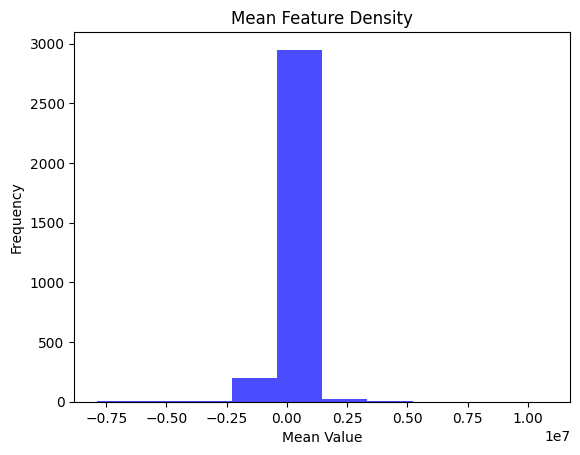

Mean: 940.9193831123362
Variance: 345374879515.4511


In [15]:
import matplotlib.pyplot as plt

# Plot histogram for a feature
plt.hist(data['mean'], bins=10, color='blue', alpha=0.7)
plt.title("Mean Feature Density")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.show()

# Calculate mean and variance
mean_value = np.mean(data['mean'])
variance_value = np.var(data['mean'])
print("Mean:", mean_value)
print("Variance:", variance_value)


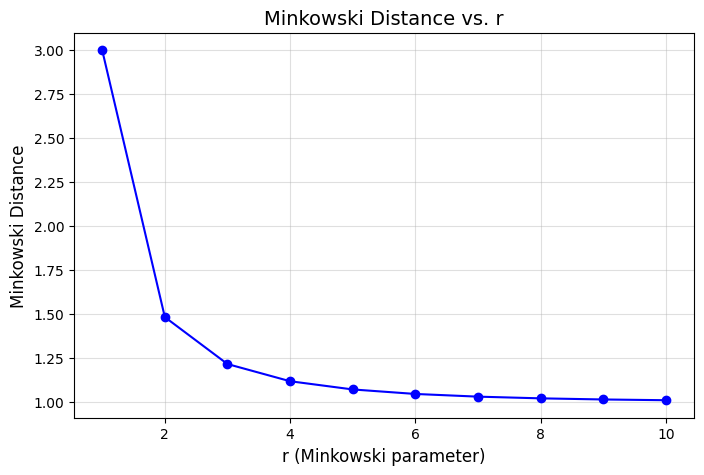

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Example feature vectors (replace with actual vectors from your dataset)
vector1 = np.array([1.2, 3.4, 5.6, 7.8, 9.0])
vector2 = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

# Function to calculate Minkowski distance
def minkowski_distance(v1, v2, r):
    return np.sum(np.abs(v1 - v2)**r)**(1/r)

# Range of r values (1 to 10)
r_values = range(1, 11)

# Compute distances
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', color='b')
plt.title("Minkowski Distance vs. r", fontsize=14)
plt.xlabel("r (Minkowski parameter)", fontsize=12)
plt.ylabel("Minkowski Distance", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [27]:
from sklearn.impute import SimpleImputer

# Initialize an imputer to replace NaN with the mean value
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train kNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the model accuracy on the test dataset
accuracy = knn.score(X_test, y_test)
print("Accuracy with k=3:", accuracy)


Accuracy with k=3: 0.6604166666666667


In [19]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Print predictions and actual values
print("Predictions:", y_pred)
print("Actual Labels:", y_test)


Predictions: [1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0

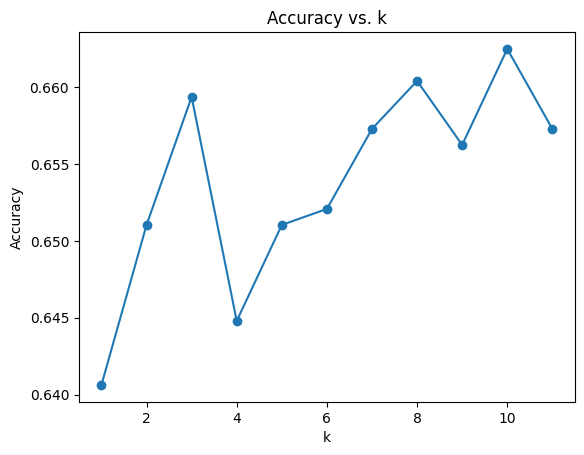

In [20]:
import matplotlib.pyplot as plt

accuracies = []
k_values = range(1, 12)

# Train and test for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


Confusion Matrix - Training Data:
[[882 295]
 [317 744]]


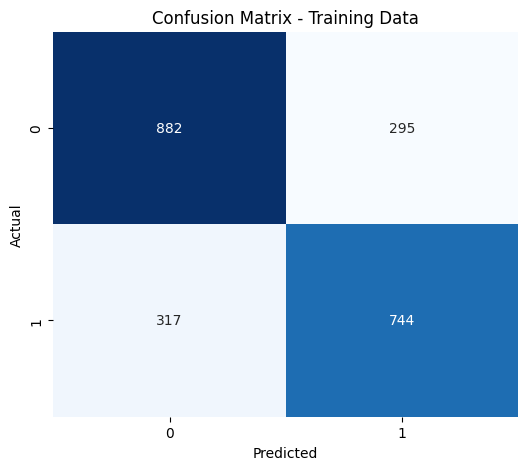


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1177
           1       0.72      0.70      0.71      1061

    accuracy                           0.73      2238
   macro avg       0.73      0.73      0.73      2238
weighted avg       0.73      0.73      0.73      2238


Confusion Matrix - Test Data:
[[346 160]
 [169 285]]


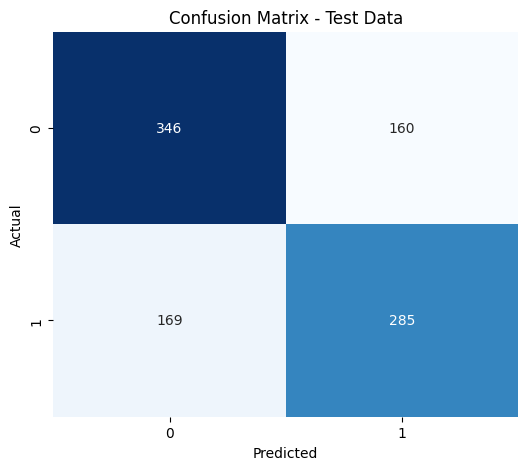


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       506
           1       0.64      0.63      0.63       454

    accuracy                           0.66       960
   macro avg       0.66      0.66      0.66       960
weighted avg       0.66      0.66      0.66       960



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions for the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix and Plot for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training Data:")
print(cm_train)
plot_confusion_matrix(cm_train, title="Confusion Matrix - Training Data")

# Classification Report for Training Data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix and Plot for Test Data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Data:")
print(cm_test)
plot_confusion_matrix(cm_test, title="Confusion Matrix - Test Data")

# Classification Report for Test Data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
